In [1]:
import pandas as pd
import numpy as np


In [2]:
# Sample categories
categories = ['Politics', 'Sports', 'Technology', 'Entertainment']

# Generate synthetic headlines
np.random.seed(0)
data = {'headline': [f"headline {i}" for i in range(1, 101)],
        'category': [np.random.choice(categories) for _ in range(100)]}

df = pd.DataFrame(data)
df

,headline,category
0,headline 1,Politics
1,headline 2,Entertainment
2,headline 3,Sports
3,headline 4,Politics
4,headline 5,Entertainment
...,...,...
95,headline 96,Politics
96,headline 97,Technology
97,headline 98,Entertainment
98,headline 99,Sports


In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['headline']).toarray()
y = df['category']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array(['Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment',
       'Entertainment', 'Entertainment', 'Entertainment', 'Entertainment'],
      dtype=object)

In [8]:
# Classification report
print(classification_report(y_test, y_pred))


               precision    recall  f1-score   support

Entertainment       0.20      1.00      0.33         4
     Politics       0.00      0.00      0.00         6
       Sports       0.00      0.00      0.00         8
   Technology       0.00      0.00      0.00         2

     accuracy                           0.20        20
    macro avg       0.05      0.25      0.08        20
 weighted avg       0.04      0.20      0.07        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

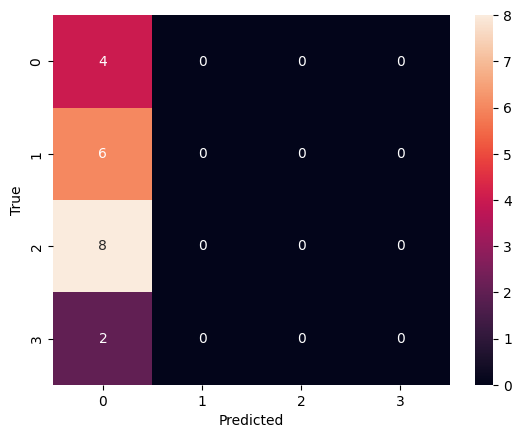

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()